# OpenStreetMap Data Case Study

## Study Area: Greater Houston Area
The area chosen in this study is Greater Houston area (Map Link: https://mapzen.com/data/metro-extracts/metro/houston_texas/). It is located along the Gulf Coast region in the U.S. state of Texas. This metropolitan area is the 5th largest metropolitan area in the United.

This study is an intitial effort to clean the OpenStreetMap data for Greater Houston Area.


## Problems Encountered in the Map and the Corresponding Cleaning Method


### 1: There are some tag attributes with capical characters. Some examples are:
```
FIXME 
Suite 
Hours
```
Cleaning method: Use lower() functuon to make the characters all lower cases.

 
### 2: There are some tags drectly calling for fixes. Some examples are:

```
{'k': 'fixme', 'v': 'Double check this when construction is done'}
{'k': 'fixme', 'v': 'some structure there, guessing at dam from imagery'}
{'k': 'fixme', 'v': 'confirm hours, may be open until 22:00'}
{'k': 'fixme', 'v': 'verify existence, no longer on imagery'}
{'k': 'fixme', 'v': 'source = guess'}
{'k': 'fixme', 'v': 'verify names'}
{'k': 'fixme', 'v': 'Lane information requires more detail'}
{'k': 'fixme', 'v': 'verify correct tagging'}
```
Cleaning method: Ignore the data with fixme or FIXME tags for now. We will need more information to update.


### 3: There are some zipcodes including more than one number. Some examples are:
```
['77002; 77004',
 '77024; 77024; 77036',
 '77338:77346',
 '77045;77489',
 '77489; 77085',
 '77099:77478',
 '77077:77084',
 '77004:77023',
 '77031:77074',
 '77088:77091',
 '77031:77035',
 '77022;77076;77009',
 '77024; 77063',
 '77009:77022',
 '77571; 77587',
 '77026:77050',
 '77037;77076',
 '77016:77026']
 ```
It seems that some zipcode tags contains both left zipcode and right zipcode.
Cleaning method: The tiger:zip_left will read the leftmost zipcode while tiger:zip_right will read rightmose zipcode.

 
### 4: There are duplicates in Tiger GPS zipcode data. One example is:
 ```
<tag k="tiger:zip_left_1" v="77389" />
<tag k="tiger:zip_left_2" v="77389" />
<tag k="tiger:zip_left_3" v="77389" />
<tag k="tiger:zip_right_1" v="77389" />
<tag k="tiger:zip_right_2" v="77389" />
<tag k="tiger:zip_right_3" v="77389" />
```
Cleaning method: Ignore the tags if the tag names end with numbers.


### 5: There are ways with multiple names.One example is:
```
<tag k="name" v="Holly Drive" />
<tag k="name_1" v="Holly Road" />
<tag k="name_2" v="Holly Street" />
```
For simplicity, we only keep the first name. 
Cleaning method: Ignore the tags if the tag names end with numbers.


### 6: Some names from Tiger GPS is a dupilcate of the value of name tag. Also, Tiger GPS data is divided into segments.One example is:
```
<tag k="name" v="Stuebner Airline Road" />
<tag k="tiger:name_base" v="Stuebner Airline" />
<tag k="tiger:name_type" v="Rd" />
```
Cleaning method: Ignore the Tiger GPS name data if there is a name tag. If not, compile the Tiger GPS data into a single street name.

 
### 7: Some street names are overabbreviated. Some examples are:
```
Wisconsin Ave
Airport Blvd
Brooding Oak Cir
```
Cleaning method: 
- if the street name ends with a number or a direction, check the second last word;
- if the street name starts or ends with a direction, check if it is overabbreviated;
- correct the street names.


### 8: There are some man-made amenity with a tag key of 'man_made'. One example is:
```
<tag k="man_made" v="groyne" />
```
Cleaning method: Change the key to 'amenity', type to 'man_made'.

The code for data cleaning is shown in '02 Data Cleaning and Output.ipynb'.

# Examples
## Example 1:
```
	<way changeset="4351805" id="15370305" timestamp="2010-04-07T07:02:07Z" uid="20587" user="balrog-kun" version="2">
		<nd ref="152196916" />
		<nd ref="152319655" />
		<nd ref="152319658" />
		<nd ref="152196584" />
		<tag k="name" v="Jubilo Lane" />
		<tag k="name_1" v="Julio Lane" />
		<tag k="highway" v="residential" />
		<tag k="tiger:cfcc" v="A41" />
		<tag k="tiger:tlid" v="96416612" />
		<tag k="tiger:county" v="Harris, TX" />
		<tag k="tiger:source" v="tiger_import_dch_v0.6_20070830" />
		<tag k="tiger:reviewed" v="no" />
		<tag k="tiger:name_base" v="Jubilo" />
		<tag k="tiger:name_type" v="Ln" />
		<tag k="tiger:separated" v="no" />
		<tag k="tiger:name_base_1" v="Julio" />
		<tag k="tiger:name_type_1" v="Ln" />
	</way>
```
- The tags ending with numbers are removed
- The tags with Tiger street names are removed since there is already a street name

--->
Example 1 Results:
```
way: {'changeset': '4351805', 'uid': '20587', 'timestamp': '2010-04-07T07:02:07Z', 'version': '2', 'user': 'balrog-kun', 'id': '15370305'}
way_nodes:
[{'id': '15370305', 'node_id': '152196916', 'position': 0},
 {'id': '15370305', 'node_id': '152319655', 'position': 1},
 {'id': '15370305', 'node_id': '152319658', 'position': 2},
 {'id': '15370305', 'node_id': '152196584', 'position': 3}]
way_tags:
[{'id': '15370305', 'key': 'street', 'type': 'addr', 'value': 'Jubilo Lane'},
 {'id': '15370305', 'key': 'highway', 'type': 'regular', 'value': 'residential'},
 {'id': '15370305', 'key': 'cfcc', 'type': 'tiger', 'value': 'A41'},
 {'id': '15370305', 'key': 'tlid', 'type': 'tiger', 'value': '96416612'},
 {'id': '15370305', 'key': 'county', 'type': 'tiger', 'value': 'Harris, TX'},
 {'id': '15370305', 'key': 'source', 'type': 'tiger', 'value': 'tiger_import_dch_v0.6_20070830'},
 {'id': '15370305', 'key': 'reviewed', 'type': 'tiger', 'value': 'no'},
 {'id': '15370305', 'key': 'separated', 'type': 'tiger', 'value': 'no'}]
 ```
 
## Example 2:
 ```
	<way changeset="39848451" id="423217818" timestamp="2016-06-06T20:31:04Z" uid="1829683" user="Luis36995" version="1">
		<nd ref="152152036" />
		<nd ref="3204973688" />
		<nd ref="152152033" />
		<nd ref="152152031" />
		<nd ref="1606750111" />
		<nd ref="4228968210" />
		<tag k="name" v="Fondren Road" />
		<tag k="oneway" v="yes" />
		<tag k="highway" v="secondary" />
		<tag k="tiger:cfcc" v="A45" />
		<tag k="tiger:county" v="Fort Bend, TX; Harris, TX" />
		<tag k="tiger:reviewed" v="no" />
		<tag k="tiger:zip_left" v="77489; 77085" />
		<tag k="tiger:name_base" v="Fondren" />
		<tag k="tiger:name_type" v="Rd" />
		<tag k="tiger:zip_right" v="77085" />
	</way>
```

- The tag for zip_left contains two zipcodes
- The right one is removed

--->
Example 2 Results:  
```
way: {'changeset': '39848451', 'uid': '1829683', 'timestamp': '2016-06-06T20:31:04Z', 'version': '1', 'user': 'Luis36995', 'id': '423217818'}
way_nodes:
[{'id': '423217818', 'node_id': '152152036', 'position': 0},
 {'id': '423217818', 'node_id': '3204973688', 'position': 1},
 {'id': '423217818', 'node_id': '152152033', 'position': 2},
 {'id': '423217818', 'node_id': '152152031', 'position': 3},
 {'id': '423217818', 'node_id': '1606750111', 'position': 4},
 {'id': '423217818', 'node_id': '4228968210', 'position': 5}]
way_tags:
[{'id': '423217818', 'key': 'street', 'type': 'addr', 'value': 'Fondren Road'},
 {'id': '423217818', 'key': 'oneway', 'type': 'regular', 'value': 'yes'},
 {'id': '423217818','key': 'highway', 'type': 'regular','value': 'secondary'},
 {'id': '423217818', 'key': 'cfcc', 'type': 'tiger', 'value': 'A45'},
 {'id': '423217818','key': 'county', 'type': 'tiger','value': 'Fort Bend, TX; Harris, TX'},
 {'id': '423217818', 'key': 'reviewed', 'type': 'tiger', 'value': 'no'},
 {'id': '423217818', 'key': 'zip_left', 'type': 'tiger', 'value': 77489},
 {'id': '423217818', 'key': 'zip_right', 'type': 'tiger', 'value': '77085'}]
 ```
 
## Example 3:
 ```
	<way changeset="39867042" id="423453623" timestamp="2016-06-07T17:46:54Z" uid="2226712" user="dannykath" version="1">
		<nd ref="152155061" />
		<nd ref="4230588229" />
		<tag k="name" v="Center Street" />
		<tag k="fixme" v="dual carriageway" />
		<tag k="highway" v="secondary" />
		<tag k="tiger:cfcc" v="A41" />
		<tag k="tiger:county" v="Harris, TX" />
		<tag k="tiger:name_base" v="Center" />
		<tag k="tiger:name_type" v="St" />
		<tag k="turn:lanes:backward" v="left||" />
	</way>
	<way changeset="40230222" id="426779592" timestamp="2016-06-23T12:03:15Z" uid="4050400" user="cactolith" version="1">
		<nd ref="4260425486" />
		<nd ref="4260425485" />
		<nd ref="4260425487" />
		<tag k="man_made" v="pier" />
	</way>
	
</osm>
```
- Since it contains a fixme tag. The whole element is ignored.

## Example 4:
 
```
	<way changeset="40230222" id="426779592" timestamp="2016-06-23T12:03:15Z" uid="4050400" user="cactolith" version="1">
		<nd ref="4260425486" />
		<nd ref="4260425485" />
		<nd ref="4260425487" />
		<tag k="man_made" v="pier" />
	</way>
```

- The man_made tag is changed to amenity with a type of man_made

--->
Example 4 Results: 
```
 way: {'changeset': '40230222', 'uid': '4050400', 'timestamp': '2016-06-23T12:03:15Z', 'version': '1', 'user': 'cactolith', 'id': '426779592'}
way_nodes:
[{'id': '426779592', 'node_id': '4260425486', 'position': 0},
 {'id': '426779592', 'node_id': '4260425485', 'position': 1},
 {'id': '426779592', 'node_id': '4260425487', 'position': 2}]
way_tags:
[{'id': '426779592', 'key': 'amenity', 'type': 'man_made', 'value': 'pier'}]
```

## Example 5: 
```
	<node changeset="50795621" id="5004383433" lat="29.7420621" lon="-95.4477453" timestamp="2017-08-03T04:36:02Z" uid="4132860" user="jamesavery" version="2">
		<tag k="addr:city" v="Houston" />
		<tag k="addr:housenumber" v="4925" />
		<tag k="addr:postcode" v="77056" />
		<tag k="addr:state" v="TX" />
		<tag k="addr:street" v="Westheimer Rd" />
		<tag k="description" v="James Avery Jewelry is a family-owned company offering finely crafted jewelry designs in sterling silver, 14K and 18K yellow and white gold, and gemstones for women and men." />
		<tag k="name" v="James Avery Jewelry" />
		<tag k="opening_hours" v="Mo-Sa 10:00-21:00, Sun 12:00-19:00" />
		<tag k="operator" v="James Avery" />
		<tag k="phone" v="7136221200" />
		<tag k="shop" v="jewelry" />
		<tag k="website" v="http://www.jamesavery.com/custserv/store_details.jsp?storeId=800" />
	</node>
```
- Westheimer Rd is changed to Westheimer Road

--->
Example 5 Results: 
```
node: {'changeset': '50795621', 'uid': '4132860', 'timestamp': '2017-08-03T04:36:02Z', 'lon': '-95.4477453', 'version': '2', 'user': 'jamesavery', 'lat': '29.7420621', 'id': '5004383433'}
node_tags:
[{'id': '5004383433', 'key': 'city', 'type': 'addr', 'value': 'Houston'},
 {'id': '5004383433', 'key': 'housenumber', 'type': 'addr', 'value': '4925'},
 {'id': '5004383433', 'key': 'postcode', 'type': 'addr', 'value': '77056'},
 {'id': '5004383433', 'key': 'state', 'type': 'addr', 'value': 'TX'},
 {'id': '5004383433', 'key': 'street','type': 'addr', 'value': 'Westheimer Road'},
 {'id': '5004383433', 'key': 'description',  'type': 'regular',  'value': 'James Avery Jewelry is a family-owned company offering finely crafted jewelry designs in sterling silver, 14K and 18K yellow and white gold, and gemstones for women and men.'},
 {'id': '5004383433', 'key': 'name', 'type': 'regular',  'value': 'James Avery Jewelry'},
 {'id': '5004383433',  'key': 'opening_hours',  'type': 'regular',  'value': 'Mo-Sa 10:00-21:00, Sun 12:00-19:00'},
 {'id': '5004383433',  'key': 'operator',  'type': 'regular',  'value': 'James Avery'},
 {'id': '5004383433',  'key': 'phone',  'type': 'regular',  'value': '7136221200'},
 {'id': '5004383433', 'key': 'shop', 'type': 'regular', 'value': 'jewelry'},
 {'id': '5004383433',  'key': 'website',  'type': 'regular',  'value': 'http://www.jamesavery.com/custserv/store_details.jsp?storeId=800'}]
 ```


## Data Overview

In this part, we are going to dive into the details of the cleaned OpenStreetMap data from Greater Houston Area. Sqlite3 is utilized to analyze the data. The codes used to generate the results here are shown in '03 SQL.ipynb'.


### File sizes

- houston_texas.osm: 786.4 MB
- houston.db : 428.3 MB
- nodes.csv : 291.2 MB
- nodes_tags.csv : 6.2 MB
- ways.csv :26.3 MB
- ways_tags.csv : 66.7 MB
- ways_nodes.cv : 99.5 MB  

### Number of nodes, ways and unique useres

1. Number of nodes: 3,486,397
2. Number of ways: 441,328
3. Number of unique users: 1,978

### Top 10 contributors
    User ID  Count
- (147510, 556989)
- (672878, 536682)
- (1110270, 485675)
- (496606, 203246)
- (3119079, 193609)
- (119881, 137301)
- (9065, 115728)
- (243003, 86031)
- (475877, 81047)
- (37392, 58765)

Top 10 users contribute 2455073 items of nodes and ways.

They, 0.51 % of total users, contribute 62 % of nodes and ways.

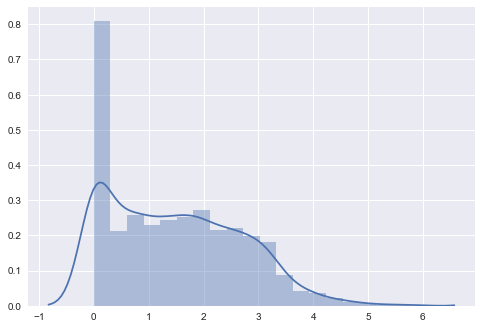

In [1]:
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


db = sqlite3.connect("/Users/jeremydai/Dropbox/Udacity_Project/OpenStreetMap/houston.db")
c = db.cursor()
query = '''
SELECT count(*) as n
FROM (select uid from nodes UNION ALL select uid from ways) as u
GROUP BY uid
'''
c.execute(query)

contri_list=[]
for row in c:
    contri_list.append(row[0])

sns.distplot(np.log10(contri_list),kde=True)


From the histgram, we can only see that contributions per person is left skewed.

### Top 10 Amenities
- 'place_of_worship', 2194
- 'school', 799
- 'fountain', 722
- 'restaurant', 700
- 'fast_food', 636
- 'fire_station', 349
- 'fuel', 281
- 'pharmacy', 176
- 'bank', 172
- 'police', 160

We can see that the number of worship place is almost triple of the number the second most popular place(school). This is not surprising since Houston is in Texas, where many people affiliate with a religion.

### Top 3 Religions
- 'christian', 2128
- 'buddhist', 16
- 'jewish', 12

We can see the the majority religon for worship places is Christian. The number of corresponding nodes is 133 times of that of second most popular religion(Buddist). Well, it is Texas. What else do you expect?

### Top 3 Cuisions
- 'mexican', 73
- 'american', 35
- 'pizza', 35

Mexican restaurants are most popular among all cuisions. This is very Houston/TX since the Hispanic population is really high here.

### Top 10 Shops
- 'supermarket', 127
- 'clothes', 121
- 'convenience', 84
- 'yes', 84
- 'beauty', 76
- 'car_repair', 65
- 'mobile_phone', 58
- 'department_store', 47
- 'hairdresser', 43
- 'alcohol', 42

It shows the most popular shops sever poeple's everyday needs: what you eat and what you wear. Also we notice some values for the 'shop' key are 'yes'. It seems different users understand this key value differently or they just did not catetgory the shop.

### Two most labelled street names
'Jason Street', 94
'Kingwood Drive', 84

To explore the details, we look into what these nodes are:
```
(u'Jason Street', u'house', 93)
(u'Kingwood Drive', u'Randalls Pharmacy', 2)
(u'Kingwood Drive', u'TGF Haircutters', 2)
(u'Kingwood Drive', u'Amegy Bank', 1)
(u'Kingwood Drive', u'Baskin Robbins', 1)
(u'Kingwood Drive', u'Bike Werks', 1)
(u'Kingwood Drive', u"Carrabba's Italian Grill", 1)
(u'Kingwood Drive', u'Chase', 1)
(u'Kingwood Drive', u'Chelsea Deli & Cafe', 1)
(u'Kingwood Drive', u"Chico's", 1)
(u'Kingwood Drive', u"Children's Place", 1)
(u'Kingwood Drive', u"Cici's Pizza", 1)
(u'Kingwood Drive', u'Cold Stone Creamery', 1)
(u'Kingwood Drive', u'Cyrese & Co', 1)
(u'Kingwood Drive', u'Darque Tan', 1)
....
```

Apprantly, Jason Street is a residential street with houses where Kingwood is a commercial street with different types of amenities. 

Based on this dataset, Jason Street is the most popular residential street while Kingwood is the most popular commerical street.


##  Additional Ideas
### Most Popular Leisure types
- 'pitch', 2503
- 'swimming_pool', 1322
- 'park', 1258
- 'playground', 773
- 'sports_centre', 135
- 'golf_course', 85
- 'garden', 75
- 'stadium', 69
- 'track', 68
- 'picnic_table', 59

As we can see, the most popular leisure types for Houston people are camping and hangingout in water. We also notice that even picnic tables are labled in the dataset.


### What are the nodes/ways with tag having 'natural' key?
(u'water', 3881)
(u'tree', 2032)
(u'wood', 1282)
(u'sand', 465)
(u'coastline', 429)
(u'wetland', 185)
(u'tree_row', 119)
(u'scrub', 79)
(u'bay', 56)
(u'beach', 43)

It appears that even trees/wood/sand are labeled in this dataset.

### Remove trvial nodes/ways
After looking to the nodes/ways with leisure key or natural key,we find that lost of trvial thing are labeled in the dataset. To make the dataset more concise, the next step may be removing these unimportant nodes/ways.

### Fixme
Also, as mentioned in the start, we may want to look into the nodes/ways with fixme tag.


# Benefits/Anticipated Issues
This data cleaning process remove potential duplicate values from Tiger GPS data and all the data with fix-me tags.

Benefits:
1. The cleaning process makes the dataset more concise 
2. It will be easier to look up the value. Tags with keys containg numeric suffix (e.g. name_1) will be removed. 

Anticipated Issues:
1. Some data will be lost during the porcess. 
2. More information is needed to validate the data with fixme tags.


# Conclusion

It is a fun start to explore the OpenStreetMap for Greater Houston Area. We find that the most popular cusine is Mexican and most popular religon is Christian. However, this dataset is apprantly incomplete and needs more data cleanining efforts.

Also, we notice that 0.51% of total users, contribute 62% of total nodes and ways. I think it would be great idea to encourage more users to contribute to the dataset. One possibe way is to follow the LOCAL GUIDE program led by Google Map. By introducing point system and reward programs, Google Mao Local Guide program encourages more users to write reviews and upload photo. 